In [15]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [16]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [17]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

#### Plaid Access Token

In this section, you will use the plaid-python api to generate the correct

authentication tokens to access data in the free developer Sandbox. This mimics

how you might connect to your own account or a customer account, but due to privacy issues, 

this homework will only require connecting to and analyzing the fake data 

from the developer sandbox that Plaid provides.

Complete the following steps to generate an access token:

1.Create a client to connect to paid

2.Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']
    
3.Exchange the public token for an access token

Test the access token by requesting and printing the available test accounts
 

#### 1. Create a client to connect to plaid

In [18]:
INSTITUTION_ID = "ins_109508"

In [19]:
 
client = plaid.Client(client_id='5ecd71be55135b0011c772a3', secret='f7cecbd8b384da39b2c9dda91a3acd', public_key='301193877b5b5df2b408d9e4609f92', environment='sandbox')
client.Institutions.get(1)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []}],
 'request_id': 'NVFhJXXKExN1kxo',
 'total': 11386}

#### 2. Generate a public token

In [20]:
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

#### 3. Exchange the public token for an access token

In [21]:

exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

#### 4. Fetch Accounts

In [22]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': '347vV3DpkwsogWgJwlgzuw5GAA84QdUwo8ZLr',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'x1eXLaZ7kwH6rArpo9rniewkKK13WQC9lA6Zw',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'dvnJeoA57asyAqAaGmANtjL4rr3MwatPg6JqK',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

#### Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of 
transactions. You will need to complete the following steps:

1.Use the access token to fetch the transactions for the last 90 days

2.Print the categories for each transaction type

3.Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category

 (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

#### 1. Fetch the Transactions for the last 90 days

In [23]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)
trans_list = transaction_response['transactions']
print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "347vV3DpkwsogWgJwlgzuw5GAA84QdUwo8ZLr",
        "account_owner": null,
        "amount": 6.33,
        "authorized_date": null,
        "category": [
            "Travel",
            "Taxi"
        ],
        "category_id": "22016000",
        "date": "2020-05-28",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Uber",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transac

#### 2. Print the categories for each transaction

In [24]:
transaction_response['transactions'][0].keys()

dict_keys(['account_id', 'account_owner', 'amount', 'authorized_date', 'category', 'category_id', 'date', 'iso_currency_code', 'location', 'name', 'payment_channel', 'payment_meta', 'pending', 'pending_transaction_id', 'transaction_code', 'transaction_id', 'transaction_type', 'unofficial_currency_code'])

#### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category.

In [25]:
dates = []
names = []
amounts = []
categories = []

for item in trans_list:
    dates.append(item['date'])
    names.append(item['name'])
    amounts.append(item['amount'])
    categories.append(item['category'][0])
dates_df = pd.DataFrame(dates) 
names_df = pd.DataFrame(names)
amounts_df = pd.DataFrame(amounts)
categories_df = pd.DataFrame(categories) 
dates_df.rename( columns={0 :'Date'}, inplace=True )
names_df.rename( columns={0 :'Name'}, inplace=True )
amounts_df.rename( columns={0 :'Amount'}, inplace=True )
categories_df.rename( columns={0 :'Category'}, inplace=True )

data = pd.concat([dates_df,names_df,amounts_df,categories_df], axis = 1)
data['Amount'] = data['Amount'].astype('float64')
data.set_index('Date',inplace=True)
data.index=pd.to_datetime(data.index)
data

,Name,Amount,Category
Date,,,
2020-05-28,Uber,6.33,Travel
2020-05-25,Tectra Inc,500.00,Food and Drink
2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-05-24,KFC,500.00,Food and Drink
2020-05-24,Madison Bicycle Shop,500.00,Shops
2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2020-05-15,Uber,5.40,Travel
2020-05-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2020-05-14,CD DEPOSIT .INITIAL.,1000.00,Transfer


In [54]:
data.to_csv(r'raw_data.csv', index=False)

In [55]:
pwd

'/home/wangalex'

#### 4. Convert the data types to the appropriate types

In [26]:
# YOUR CODE HERE
data.dtypes

Name         object
Amount      float64
Category     object
dtype: object

#### Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1.Determine the previous year's gross income and print the results

2.Determine the current monthly income and print the results

3.Determine the projected yearly income and print the results

In [27]:
income = client.Income.get(access_token)

In [28]:
prev_year_income = income['income']['last_year_income']
print(f'Previous years income was ${prev_year_income} ')

Previous years income was $6000 


In [29]:
current_monthly_income = income['income']['income_streams'][0]['monthly_income']
print(f'Current monthly income is ${current_monthly_income} ')

Current monthly income is $500 


In [30]:
projected_year_income = income['income']['projected_yearly_income']
print(f'Projected yearly income is ${projected_year_income} ')

Projected yearly income is $6085 


#### Cashflow Analysis
In this section, you will use the transactions DataFrame to analyze the customer's cashflow

1.Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2.Generate a bar chart with the number of transactions for each category

3.Calulate the expenses per month

4.Plot the total expenses per month

#### Calculate the expenses per category

In [31]:
# YOUR CODE HERE
amount_df = data.groupby('Category').sum()
print(amount_df)

                  Amount
Category                
Food and Drink   3317.19
Payment          6310.50
Recreation        235.50
Shops            1500.00
Transfer        20537.34
Travel             35.19


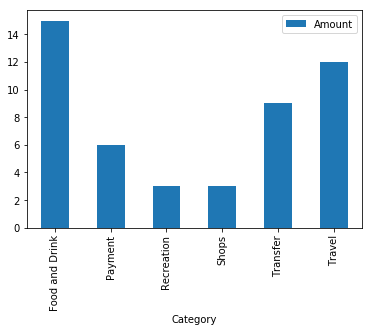

In [32]:
transactions_count = data.groupby('Category').count()
transactions_count.drop(['Name'], axis=1,inplace=True)
transactions_count.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c66284f28>],
      dtype=object)

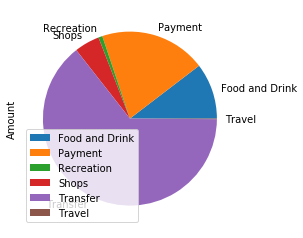

In [33]:
amount_df.plot.pie(subplots=True)

#### Calculate the expenses per month

In [34]:
# YOUR CODE HERE
data_multi_index = data.groupby([data.index.year, data.index.month, data.index.day]).first()
data_multi_index

Name   Amount        Category
Date Date Date                                                                
2020 3    1                           United Airlines   500.00          Travel
          11                             INTRST PYMNT    -4.22        Transfer
          12                                 SparkFun    89.40  Food and Drink
          13                               McDonald's    12.00  Food and Drink
          14                      Touchstone Climbing    78.50      Recreation
          15    ACH Electronic CreditGUSTO PAY 123456  5850.00        Transfer
          16             CREDIT CARD 3333 PAYMENT *//    25.00         Payment
          25                AUTOMATIC PAYMENT - THANK  2078.50         Payment
          26                               Tectra Inc   500.00  Food and Drink
          29                                     Uber     6.33          Travel
          31                          United Airlines   500.00          Travel
     4    10                             INTRST PYMNT    -4.22        Transfer
          11                                 SparkFun    89.40  Food and Drink
          12                               McDonald's    12.00  Food and Drink
          13                      Touchstone Climbing    78.50      Recreation
          14    ACH Electronic CreditGUSTO PAY 123456  5850.00        Transfer
          15             CREDIT CARD 3333 PAYMENT *//    25.00         Payment
          24                AUTOMATIC PAYMENT - THANK  2078.50         Payment
          25                               Tectra Inc   500.00  Food and Drink
          28                                     Uber     6.33          Travel
          30                          United Airlines   500.00          Travel
     5    10                             INTRST PYMNT    -4.22        Transfer
          11                                 SparkFun    89.40  Food and Drink
          12                               McDonald's    12.00  Food and Drink
          13                      Touchstone Climbing    78.50      Recreation
          14    ACH Electronic CreditGUSTO PAY 123456  5850.00        Transfer
          15             CREDIT CARD 3333 PAYMENT *//    25.00         Payment
          24                AUTOMATIC PAYMENT - THANK  2078.50         Payment
          25                               Tectra Inc   500.00  Food and Drink
          28                                     Uber     6.33          Travel

In [56]:
data_multi_index.to_csv(r'cash_flow_months.csv', index=False)

In [39]:
data_multi_index_1 = data_multi_index.loc[2020,5]
data_multi_index_1.sum()

Name        INTRST PYMNTSparkFunMcDonald'sTouchstone Climb...
Amount                                                8635.51
Category    TransferFood and DrinkFood and DrinkRecreation...
dtype: object

In [40]:
data_multi_index_2 = data_multi_index.loc[2020,3]
data_multi_index_2.sum()

Name        United AirlinesINTRST PYMNTSparkFunMcDonald'sT...
Amount                                                9635.51
Category    TravelTransferFood and DrinkFood and DrinkRecr...
dtype: object

In [41]:
data_multi_index_3 = data_multi_index.loc[2020,4]
data_multi_index_3.sum()

Name        INTRST PYMNTSparkFunMcDonald'sTouchstone Climb...
Amount                                                9135.51
Category    TransferFood and DrinkFood and DrinkRecreation...
dtype: object

#### Calculate the expenses per  3 months

In [47]:
data_month = [['Marth', 9135.51], ['April', 9635.51],['May', 8635.51]]
data_month_df = pd.DataFrame(data_month, columns = ['Month', 'Expenses']) 
data_month_df

,Month,Expenses
0,Marth,9135.51
1,April,9635.51
2,May,8635.51
